# 1 Python data retrieval
## Inleiding
Het notebook 'Data retrieval met python' is het eerste notebook van een serie. In dit notebook wordt beschreven hoe HiSPARC data met de HiSPARC sapphire module voor python op te halen is. De installatie van sapphire is beschreven op:

[http://docs.hisparc.nl/sapphire/installation.html#installing-the-prerequisites](http://docs.hisparc.nl/sapphire/installation.html#installing-the-prerequisites)

Nadat deze installatie is voltooid, kan de sapphire module in python geladen worden. (Klik met de muis in de onderstaande code-cel en druk op shift-enter):

In [70]:
import sapphire

Boven deze regel staat als het goed is de code-cel met "`import sapphire`". Wordt een foutcode afgebeeld, dan is de installatie niet gelukt. De sapphire module bevat onder andere de "`quick_download`" functie. Deze functie maakt het mogelijk om data (meetgegevens) uit de HiSPARC data-server op te halen. 

Aan de functie wordt het stationsnummer als parameter meegegeven. Hieronder wordt data voor station 102 opgehaald. Uiteraard is deze opdracht aan te passen zodat er data van een andere station opgehaald wordt. (Dit doen we weer door in de code-cel te klikken en op shift-enter te drukken). 

In [71]:
from sapphire import quick_download
data = quick_download(102)

100%|###############################################################################################|Time: 0:00:05


Na enige tijd verschijnt hierboven een regel zoals:

"`100%|############################################################|Time: 0:00:06`"

Soms is de download zo snel dat deze regel niet wordt afgedrukt.

De variabele "`data`" bevat nu een set meetgegevens. Deze set is af te drukken. 

In [72]:
print data

data3.h5 (File) ''
Last modif.: 'Sun May 15 13:40:26 2016'
Object Tree: 
/ (RootGroup) ''
/s102 (Group) ''
/s102/events (Table(46329,)) ''



Het "`data`" bestand heeft een hierarchise opbouw. In "`data`" zit een RootGroup, deze is te benaderen met "`data.root`". Hierin zit weer een groep "`s102`", deze is te benaderen met "`data.root.s102`". Hierin zit een tabel "`events`". 

## Werken met een events tabel
Voor het gemak maken we een variable `events` die naar de eventstabel van station 102 wijst:

In [73]:
events = data.root.s102.events
events

/s102/events (Table(46329,)) ''
  description := {
  "event_id": UInt32Col(shape=(), dflt=0, pos=0),
  "timestamp": Time32Col(shape=(), dflt=0, pos=1),
  "nanoseconds": UInt32Col(shape=(), dflt=0, pos=2),
  "ext_timestamp": UInt64Col(shape=(), dflt=0, pos=3),
  "pulseheights": Int16Col(shape=(4,), dflt=0, pos=4),
  "integrals": Int32Col(shape=(4,), dflt=0, pos=5),
  "n1": Float32Col(shape=(), dflt=0.0, pos=6),
  "n2": Float32Col(shape=(), dflt=0.0, pos=7),
  "n3": Float32Col(shape=(), dflt=0.0, pos=8),
  "n4": Float32Col(shape=(), dflt=0.0, pos=9),
  "t1": Float32Col(shape=(), dflt=0.0, pos=10),
  "t2": Float32Col(shape=(), dflt=0.0, pos=11),
  "t3": Float32Col(shape=(), dflt=0.0, pos=12),
  "t4": Float32Col(shape=(), dflt=0.0, pos=13),
  "t_trigger": Float32Col(shape=(), dflt=0.0, pos=14)}
  byteorder := 'little'
  chunkshape := (819,)

Dit is een tabel van 46329 regels. Elke regel is een event.

De informatie van het eerste event is op te halen met:

In [74]:
events[0]

(0L, 1463184005, 415911950L, 1463184005415911950L, [51, 408, -1, -1], [273, 4758, -1, -1], 0.09311699867248535, 1.7879999876022339, -1.0, -1.0, 1017.5, 995.0, -1.0, -1.0, 1027.5)

Het **tweede** event: (Let op, python telt vanaf 0 en niet vanaf 1)

In [75]:
events[1]

(1L, 1463184007, 477545438L, 1463184007477545438L, [115, 356, -1, -1], [854, 4063, -1, -1], 0.2912899851799011, 1.5268000364303589, -1.0, -1.0, 995.0, 1055.0, -1.0, -1.0, 1057.5)

De informatie in een event bestaat uit een lijst getallen. Deze getallen hebben de volgende betekenis:

1. event_id: Het unieke nummer van het event in deze dataset.
1. timestamp: De tijd in hele seconden (GPS) waarop de trigger van het event plaatsvond. 
1. nanoseconds: De tijd in nanoseconden waarop de trigger van het event plaatsvond.
1. ext_timestamp: Dit getal is vrij groot, namelijk de twee vorige achter elkaar.
1. pulseheights: Een array met pulshoogten, "`-1`" betekent dat er geen detector was.
1. integrals: Een array met pulsoppervlakten, "`-1`" betekent ook hier dat er geen detector was.
1. n1: Het aantal MIPS's (Minimal Ionising Particles) dat in detector 1 is gereconstrueerd.
1. n2
1. n3
1. n4
1. t1: De gereconstrueerde detectietijden vanaf het begin van het opgeslagen signaal voor detector 1.
1. t2
1. t3
1. t4
1. t_trigger: Het moment van de GPS-tijdstempel vanaf het begin van het opgeslagen signaal.

In het werkblad [http://docs.hisparc.nl/infopakket/pdf/traces.pdf](http://docs.hisparc.nl/infopakket/pdf/traces.pdf) wordt de natuurkundige betekenis van deze getallen beschreven.  De afbeeldingen in dit werkblad zijn afkomstig uit het interactieve werkblad [http://data.hisparc.nl/media/jsparc/jsparc.html](http://data.hisparc.nl/media/jsparc/jsparc.html). Let op, computers tellen vanaf "`0`" en niet vanaf "`1`"



### Werken met kolomnamen

Een kolom zoals 'event_id', 'timestamp' of 't1' kan opgevraagd worden door de index van de kolom (0, 1, 2, ...) of door de kolomnaam. Door gebruik te maken van de kolomnaam wordt de code veel beter leesbaar:

In [76]:
first_event = events[0]
first_event['timestamp']

1463184005

Het aantal gereconstrueerde deeltjes in detector 1 (het zevende getal) bij het eerste event is dus te vinden met:
```
events[0][6]  # 7de kolom van 1ste rij
```
en:
```
first_event = event[0]
first_event['n1']
```
De tweede code is weliswaar langer, maar veel beter leesbaar.

In [79]:
print first_event['n1']
print events[0][6]

0.093117
0.093117


Een array met pulshoogten in ADC-waarden is in dit geval te vinden met:

In [81]:
first_event['pulseheights']

array([ 51, 408,  -1,  -1], dtype=int16)

Merk op dat de pulshoogtes van detector 3 en 4 de waarde '-1' hebben. De waarde '-1' betekent dat de pulsehoogte niet bepaald kon worden; Station 102 heeft slechts twee detectoren.

De eerste pulshoogte is te vinden met:

In [85]:
first_event['pulseheights'][0]

51

### Eventkolommen gebruiken
Vaak is het eenvoudiger om de hele *kolom* `n1` in een keer te bekijken:

De variabele `n1` wijst naar de kolom `n1`
en we bekijken de eerste 30 regels (events):

In [90]:
n1 = events.col('n1')
n1[0:30]

array([ 0.093117  ,  0.29128999,  0.064807  ,  0.13813999,  0.090048  ,
        0.33768001,  0.0938    ,  0.63067001,  0.21557   ,  0.086296  ,
        0.43557   ,  0.16678999,  0.08766   ,  2.4388001 ,  0.19543999,
        0.41681001,  1.19589996,  0.75380999,  0.10164   ,  2.69260001,
        0.88615   ,  0.1013    ,  0.92606002,  1.02769995,  0.067877  ,
        0.19612999,  0.18179999,  0.21455   ,  1.17439997,  1.26890004], dtype=float32)

We kunnen nu de data uit een hele kolom verwerken en/of plotten:

In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

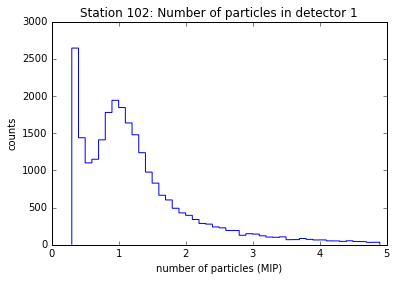

In [66]:
n1 = events.col('n1')
plt.hist(n1, bins=np.arange(0.3, 5., .1), histtype='step')
plt.title('Station 102: Number of particles in detector 1')
plt.xlabel('number of particles (MIP)')
plt.ylabel('counts')